In [1]:
import numpy as np
import os
import struct
import requests

In [4]:
def get_number(byte):
    return int.from_bytes(byte, "big")
def parse_images(file_path):
    with open(file_path, "rb") as f:
        magic_num = get_number(f.read(4))
        image_count = get_number(f.read(4))
        rows = get_number(f.read(4))
        cols = get_number(f.read(4))
        print("rows: ", rows, "cols", cols);
        images = np.zeros((image_count, rows, cols))

        current_img = 0
        current_row = 0
        current_col = 0

        while current_img < image_count:
            num = get_number(f.read(1))
            images[current_img, current_row, current_col] = num

            if current_row == rows - 1 and current_col == cols - 1:
                current_img += 1
                current_row = 0
                current_col = 0
            elif current_col == cols - 1:
                current_row += 1
                current_col = 0
            else:
                current_col += 1
    return images
def parse_labels(file_path):
    with open(file_path, "rb") as f:
        magic_num = get_number(f.read(4))
        label_count = get_number(f.read(4))

        labels = np.zeros((label_count))
        current_label = 0

        while current_label < label_count:
            num = get_number(f.read(1))
            labels[current_label] = num
            current_label += 1

        return labels
def parse_data():
    train_images_path =os.path.abspath("train-images-idx3-ubyte")
    test_images_path = os.path.abspath("t10k-images-idx3-ubyte")

    train_labels_path =os.path.abspath("train-labels-idx1-ubyte")
    test_labels_path = os.path.abspath("t10k-labels-idx1-ubyte")

    x_train = parse_images(train_images_path)
    y_train = parse_labels(train_labels_path)

    x_test = parse_images(test_images_path)
    y_test = parse_labels(test_labels_path)

    return (x_train, y_train), (x_test, y_test)

In [5]:
(x_train, y_train), (x_test, y_test) = parse_data()

rows:  28 cols 28
rows:  28 cols 28


In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Apply KNN Classifier (K=1)

In [8]:
knn = KNeighborsClassifier(n_neighbors=1)

In [9]:
knn.fit(x_train.flatten().reshape(60000,784),y_train.reshape(60000,1))

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [10]:
knn.score(x_train.flatten().reshape(60000,784),y_train.reshape(60000,1))

1.0

In [11]:
knn.score(x_test.flatten().reshape(10000,784),y_test.reshape(10000,1))

0.9691

In [20]:
print('test error when k=1 ',round(1 -0.9691,3))

test error when k=1  0.031


# Apply logistic classifier

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lr = LogisticRegression()

In [23]:
lr.fit(x_train.flatten().reshape(60000,784),y_train.reshape(60000,1))

/opt/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
lr.score(x_train.flatten().reshape(60000,784),y_train.reshape(60000,1))

0.9339166666666666

In [25]:
lr.score(x_test.flatten().reshape(10000,784),y_test.reshape(10000,1))

0.9255

In [27]:
print('test error of Logistic Regression ',round(1-0.9255,4))

test error of Logistic Regression  0.0745


In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
y_predict = lr.predict(x_test.flatten().reshape(10000,784))

In [143]:
confusion_table = confusion_matrix(y_test.reshape(10000,1), y_predict)
confusion_table = confusion_table/np.sum(confusion_table,axis=1)
confusion_table

array([[9.83e-01, 0.00e+00, 0.00e+00, 2.97e-03, 1.02e-03, 3.36e-03,
        4.18e-03, 3.89e-03, 2.05e-03, 0.00e+00],
       [0.00e+00, 9.80e-01, 3.88e-03, 1.98e-03, 0.00e+00, 1.12e-03,
        3.13e-03, 1.95e-03, 1.13e-02, 0.00e+00],
       [3.06e-03, 8.81e-03, 8.97e-01, 1.49e-02, 6.11e-03, 4.48e-03,
        1.57e-02, 7.78e-03, 4.31e-02, 2.97e-03],
       [4.08e-03, 8.81e-04, 2.03e-02, 9.07e-01, 1.02e-03, 2.91e-02,
        3.13e-03, 8.75e-03, 2.26e-02, 6.94e-03],
       [1.02e-03, 8.81e-04, 6.78e-03, 2.97e-03, 9.27e-01, 0.00e+00,
        9.39e-03, 6.81e-03, 1.03e-02, 3.37e-02],
       [1.12e-02, 1.76e-03, 9.69e-04, 3.27e-02, 1.12e-02, 8.70e-01,
        1.15e-02, 5.84e-03, 3.59e-02, 5.95e-03],
       [9.18e-03, 2.64e-03, 6.78e-03, 2.97e-03, 7.13e-03, 1.79e-02,
        9.50e-01, 1.95e-03, 1.03e-03, 0.00e+00],
       [1.02e-03, 5.29e-03, 2.33e-02, 4.95e-03, 7.13e-03, 1.12e-03,
        0.00e+00, 9.25e-01, 3.08e-03, 2.97e-02],
       [8.16e-03, 6.17e-03, 5.81e-03, 2.28e-02, 6.11e-03, 2.91e-

In [144]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97       980
         1.0       0.97      0.98      0.97      1135
         2.0       0.93      0.90      0.91      1032
         3.0       0.90      0.91      0.91      1010
         4.0       0.93      0.93      0.93       982
         5.0       0.90      0.87      0.89       892
         6.0       0.94      0.95      0.95       958
         7.0       0.93      0.93      0.93      1028
         8.0       0.87      0.89      0.88       974
         9.0       0.91      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



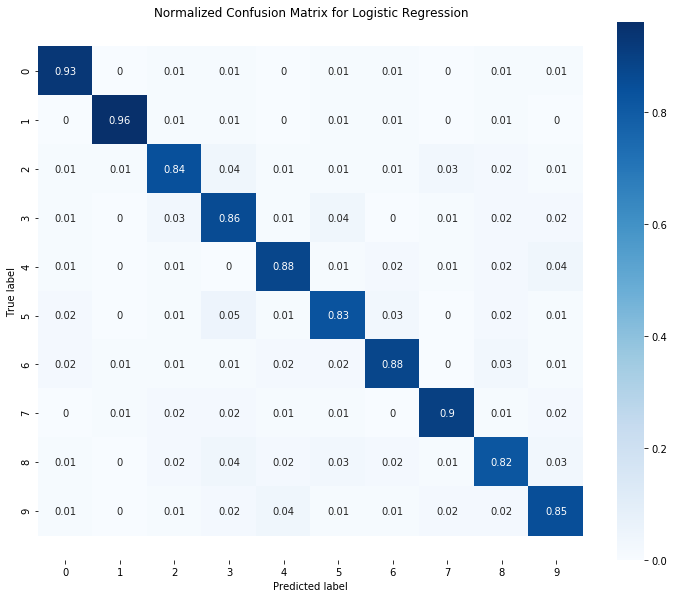

In [173]:
import seaborn as sns
plt.figure(figsize = (10,8))
np.set_printoptions(precision=2)
ax = sns.heatmap(confusion_table.round(2), annot=True,cmap='Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 1, top - 1)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Normalized Confusion Matrix for Logistic Regression')
plt.savefig('Normalized Confusion Matrix for Logistic Regression.png')
plt.show()

# Apply Decision Tree

In [139]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [140]:
clf = clf.fit(x_train.flatten().reshape(60000,784),y_train.reshape(60000,1))

In [157]:
y_pred = clf.predict(x_test.flatten().reshape(10000,784))

In [159]:
from sklearn.metrics import accuracy_score
print("accuracy of decision tree is: ",(accuracy_score(y_test.reshape(10000,1),y_pred).round(3)))

accuracy of decision tree is:  0.878


In [161]:
confusion_table = confusion_matrix(y_test.reshape(10000,1), y_pred)
confusion_table = confusion_table/np.sum(confusion_table,axis=1)
confusion_table

array([[0.93, 0.  , 0.01, 0.01, 0.  , 0.01, 0.01, 0.  , 0.01, 0.01],
       [0.  , 0.96, 0.01, 0.01, 0.  , 0.01, 0.01, 0.  , 0.01, 0.  ],
       [0.01, 0.01, 0.84, 0.04, 0.01, 0.01, 0.01, 0.03, 0.02, 0.01],
       [0.01, 0.  , 0.03, 0.86, 0.01, 0.04, 0.  , 0.01, 0.02, 0.02],
       [0.01, 0.  , 0.01, 0.  , 0.88, 0.01, 0.02, 0.01, 0.02, 0.04],
       [0.02, 0.  , 0.01, 0.05, 0.01, 0.83, 0.03, 0.  , 0.02, 0.01],
       [0.02, 0.01, 0.01, 0.01, 0.02, 0.02, 0.88, 0.  , 0.03, 0.01],
       [0.  , 0.01, 0.02, 0.02, 0.01, 0.01, 0.  , 0.9 , 0.01, 0.02],
       [0.01, 0.  , 0.02, 0.04, 0.02, 0.03, 0.02, 0.01, 0.82, 0.03],
       [0.01, 0.  , 0.01, 0.02, 0.04, 0.01, 0.01, 0.02, 0.02, 0.85]])

In [162]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92       980
         1.0       0.95      0.96      0.96      1135
         2.0       0.87      0.84      0.86      1032
         3.0       0.81      0.86      0.83      1010
         4.0       0.89      0.88      0.88       982
         5.0       0.84      0.83      0.83       892
         6.0       0.89      0.88      0.89       958
         7.0       0.92      0.90      0.91      1028
         8.0       0.84      0.82      0.83       974
         9.0       0.85      0.85      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



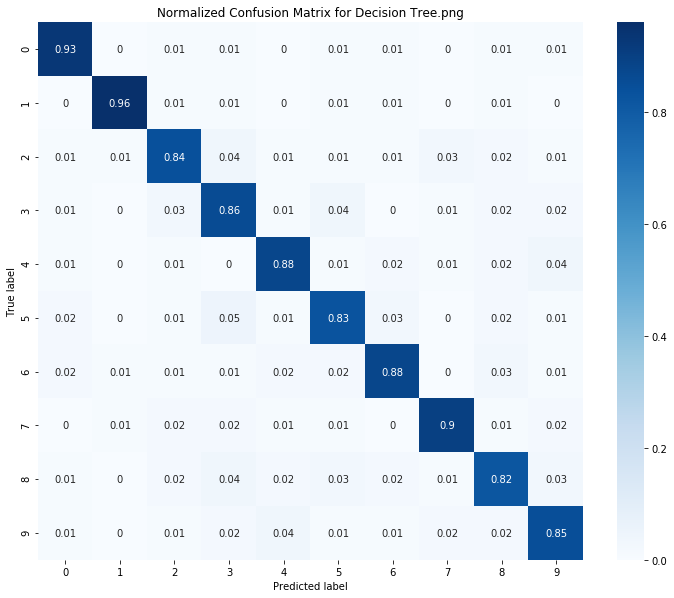

In [176]:
import seaborn as sns
plt.figure(figsize = (10,8))
np.set_printoptions(precision=2)
ax = sns.heatmap(confusion_table.round(2), annot=True,cmap='Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Normalized Confusion Matrix for Decision Tree.png')
plt.show()